In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_pickle('ecommerce_data_cleaned.pkl')

#  Feature Selection 
features = ['customer_age', 'customer_gender', 'product_category', 
            'payment_method', 'order_value_usd', 'delivery_time_days']

X = df[features].copy()
y = df['returned_status']

# Categorical Encoding 
le = LabelEncoder()
for col in ['customer_gender', 'product_category', 'payment_method']:
    X[col] = le.fit_transform(X[col])

#Train/Test Split:80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f" Training set size: {len(X_train)}")
print(f" Testing set size: {len(X_test)}")

 Training set size: 4000
 Testing set size: 1000


/var/folders/pb/6bhlmzkx375g_t63x2_w3gnc0000gn/T/ipykernel_4193/1263065560.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


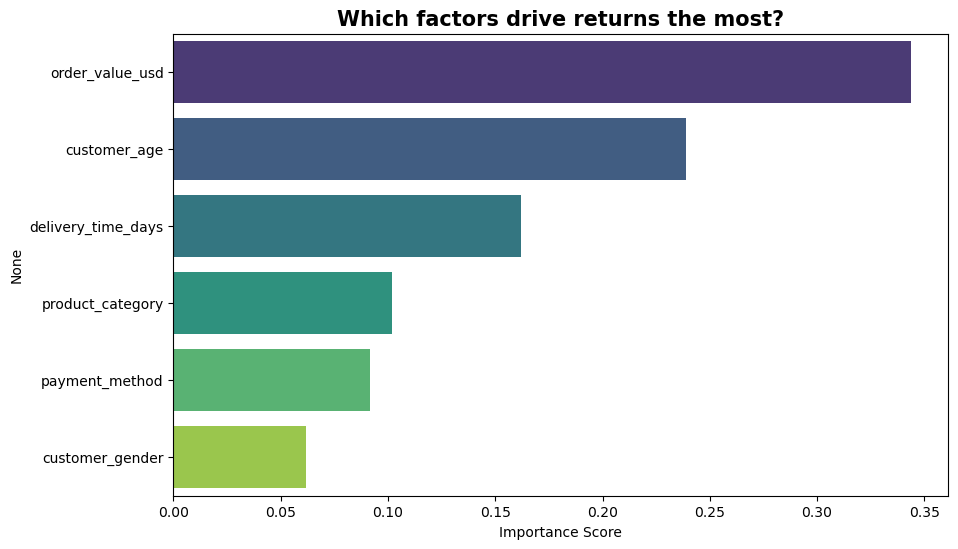

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
#Model Training 
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance Visualization
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Which factors drive returns the most?', fontsize=15, fontweight='bold')
plt.xlabel('Importance Score')
plt.show()

In [16]:
#  Prediction & Evaluation 
y_pred = rf_model.predict(X_test)

print(" Model Performance Report:")
print(classification_report(y_test, y_pred))

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" Overall Model Accuracy: {accuracy*100:.2f}%")

 Model Performance Report:
              precision    recall  f1-score   support

           0       0.52      0.49      0.51       493
           1       0.53      0.55      0.54       507

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000

 Overall Model Accuracy: 52.40%


In [17]:
import joblib

joblib.dump(rf_model, 'return_prediction_rf_model.pkl')
print(" Model saved as return_prediction_rf_model.pkl")

# future used
# loaded_model = joblib.load('return_prediction_rf_model.pkl')

 Model saved as return_prediction_rf_model.pkl
